# Random selection

In [1]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna

In [2]:
df_prc = pd.read_csv("/Users/alex/Desktop/prc.csv")

In [3]:
# 4213 stocks
num_stocks=df_prc['gvkey'].value_counts()

In [4]:
name_list = list(num_stocks.index)

In [5]:
#  randomly select 200 companies
import random
from random import sample
random_keys = sample(name_list,200)

In [6]:
# random 200 in 20 years
df_sample = df_prc[df_prc['gvkey'].isin(random_keys)]

In [7]:
# random 200 companies in 10 years
df_sample['date'] = pd.to_datetime(df_sample['date'], format='%Y-%m-%d')

<ipython-input-7-d8490e38bcd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['date'] = pd.to_datetime(df_sample['date'], format='%Y-%m-%d')


In [8]:
df_sample['year'] = pd.DatetimeIndex(df_sample['date']).year

<ipython-input-8-485bb4fc33dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['year'] = pd.DatetimeIndex(df_sample['date']).year


In [9]:
# random pick 10 years
random_years = sample(list(range(1999,2021)),10)

In [10]:
# get 10 year data
df = df_sample[df_sample['year'].isin(random_years)]
df.reset_index(inplace=True, drop=True)
df

,date,gvkey,open,high,low,close,volume,year
0,2000-01-03,15547,NaN,4.934211,4.736842,4.914474,11953,2000
1,2000-01-04,15547,NaN,4.901316,4.809211,4.845395,6926,2000
2,2000-01-05,15547,NaN,4.802632,4.542763,4.802632,10950,2000
3,2000-01-06,15547,NaN,4.763158,4.516447,4.618421,14718,2000
4,2000-01-07,15547,NaN,4.710526,4.572368,4.618421,6108,2000
...,...,...,...,...,...,...,...,...
219013,2020-12-21,336436,3.13,3.130000,2.860000,3.000000,7000,2020
219014,2020-12-22,336436,3.05,3.340000,3.050000,3.340000,3000,2020
219015,2020-12-23,336436,3.38,3.380000,3.100000,3.150000,4500,2020
219016,2020-12-29,336436,3.05,3.090000,2.960000,3.090000,3500,2020


# Fit technicals

In [11]:
df=df.sort_values(by=['gvkey','date'])
sorted_name_list = sorted(random_keys)

In [12]:
df

,date,gvkey,open,high,low,close,volume,year
0,2000-01-03,15547,NaN,4.934211,4.736842,4.914474,11953,2000
1,2000-01-04,15547,NaN,4.901316,4.809211,4.845395,6926,2000
2,2000-01-05,15547,NaN,4.802632,4.542763,4.802632,10950,2000
3,2000-01-06,15547,NaN,4.763158,4.516447,4.618421,14718,2000
4,2000-01-07,15547,NaN,4.710526,4.572368,4.618421,6108,2000
...,...,...,...,...,...,...,...,...
219013,2020-12-21,336436,3.13,3.130000,2.860000,3.000000,7000,2020
219014,2020-12-22,336436,3.05,3.340000,3.050000,3.340000,3000,2020
219015,2020-12-23,336436,3.38,3.380000,3.100000,3.150000,4500,2020
219016,2020-12-29,336436,3.05,3.090000,2.960000,3.090000,3500,2020


In [13]:
from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import KAMAIndicator
from ta.momentum import PercentagePriceOscillator
from ta.momentum import ROCIndicator
from ta.momentum import RSIIndicator
from ta.momentum import UltimateOscillator
from ta.volume import ForceIndexIndicator
from ta.volume import AccDistIndexIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from ta.volume import EaseOfMovementIndicator
from ta.volume import MFIIndicator
from ta.volume import VolumePriceTrendIndicator
from ta.volatility import BollingerBands
from ta.volatility import DonchianChannel
from ta.volatility import UlcerIndex
from ta.volatility import KeltnerChannel
from ta.trend import ADXIndicator
from ta.trend import AroonIndicator
from ta.trend import EMAIndicator
from ta.trend import MACD
from ta.trend import MassIndex

In [14]:
awesome_oscilator_list = []
kama_list = []
percentage_price_oscilator_list = []
percentage_price_signal_list = []
roci_list = []
rsi_list = []
ultimate_oscilator_list = []
adi_list = []
chaikin_list = []
eom_list = []
eom_signal = []
fii_list = []
mfi_list = []
vpt_list = []
bb_high_list = []
bb_high_ind_list=[]
bb_low_list = []
bb_low_ind_list = []
dohcian_high_list = []
dohcian_low_list =[]
dohcian_mid_list = []
dohcian_perc_list = []
dohcian_bandwidth_list = []
ulcer_list = []
kc_low_list = []
kc_high_list = []
kc_high_ind_list = []
kc_low_ind_list = []
kc_mid_list = []
kc_p_list = []
kc_bandwidth_list = []
adx_short_list = []
adx_neg_list = []
adx_pos_list = []
aroon_down_list = []
aroon_up_list = []
aroon_indicator = []
ema_14_list = []
ema_25_list = []
ema_40_list = []
ema_50_list = []
ema_100_list = []
macd_list = []
macd_signal = []
mass_index_list = []

In [15]:
for i in sorted_name_list:
    df_a = df[df['gvkey']==i]
    AwesomeOscillator = AwesomeOscillatorIndicator(high=df_a["high"],low=df_a["low"],window1 = 5,window2 =34)
    #df_a['AwesomeOscillator'] = AwesomeOscillator.awesome_oscillator()
    awesome_oscilator_list.append(list(AwesomeOscillator.awesome_oscillator().values))
    
    KAMA = KAMAIndicator(close = df_a["close"],window = 10,pow1 = 2, pow2 = 30)
    kama_list.append(list(KAMA.kama().values))
    
    PPO = PercentagePriceOscillator(close = df_a["close"],window_slow = 26, window_fast = 12, window_sign = 9)
    percentage_price_oscilator_list.append(list(PPO.ppo().values))
    percentage_price_signal_list.append(list(PPO.ppo_signal().values))
    
    ROCI = ROCIndicator(close=df_a["close"],window=12)
    roci_list.append(list(ROCI.roc().values))
    
    RSI = RSIIndicator(close=df_a["close"],window = 14)
    rsi_list.append(list(RSI.rsi().values))

    UO = UltimateOscillator(high = df_a["high"] , low = df_a["low"],close = df_a["close"],window1=7,window2=14,window3=28,weight1=4.0,weight2=2.0,weight3=1.0)
    ultimate_oscilator_list.append(list(UO.ultimate_oscillator().values))
    
    ADI = AccDistIndexIndicator(high = df_a["high"], low = df_a["low"], close= df_a["close"], volume = df_a["volume"])
    adi_list.append(list(ADI.acc_dist_index().values))
    
    Chaikin = ChaikinMoneyFlowIndicator(high = df_a["high"], low = df_a["low"], close= df_a["close"],volume=df_a["volume"],window = 20)
    chaikin_list.append(list(Chaikin.chaikin_money_flow().values))
    
    EOM = EaseOfMovementIndicator(high = df_a["high"], low = df_a["low"],volume=df_a["volume"],window = 14)
    eom_list.append(list(EOM.ease_of_movement().values))
    eom_signal.append(list(EOM.sma_ease_of_movement().values))
    
    FII = ForceIndexIndicator(close = df_a["close"],volume = df_a["volume"], window = 13)
    fii_list.append(list(FII.force_index().values))
    
    MFI = MFIIndicator(high = df_a["high"], low = df_a["low"],close = df_a["close"],volume = df_a["volume"],window = 14)
    mfi_list.append(list(MFI.money_flow_index().values))

    VPT = VolumePriceTrendIndicator(close = df_a["close"],volume = df_a["volume"])
    vpt_list.append(list(VPT.volume_price_trend().values))

    BB = BollingerBands(close = df_a["close"],window = 20, window_dev = 2)
    bb_high_list.append(list(BB.bollinger_hband().values))
    bb_high_ind_list.append(list(BB.bollinger_hband_indicator().values))
    bb_low_list.append(list(BB.bollinger_lband().values))
    bb_low_ind_list.append(list(BB.bollinger_lband_indicator().values))
    
    Donchian = DonchianChannel(high = df_a["high"],low = df_a["low"],close = df_a["close"], window = 20 , offset = 0)
    dohcian_high_list.append(list(Donchian.donchian_channel_hband().values))
    dohcian_low_list.append(list(Donchian.donchian_channel_lband().values))
    dohcian_mid_list.append(list(Donchian.donchian_channel_mband().values))
    dohcian_perc_list.append(list(Donchian.donchian_channel_pband().values))
    dohcian_bandwidth_list.append(list(Donchian.donchian_channel_wband().values))
    
    Ulcer = UlcerIndex(close = df_a["close"], window = 14)
    ulcer_list.append(list(Ulcer.ulcer_index().values))
    
    #KC = KeltnerChannel(high = df_a["high"],low = df_a["low"],close = df_a["close"], window = 20, window_atr = 10,original_version = False)
    #kc_high_list.append(list(KC.keltner_channel_hband().values))
    #kc_high_ind_list.append(list(KC.keltner_channel_hband_indicator().values))
    #kc_low_list.append(list(KC.keltner_channel_lband().values))
    #kc_low_ind_list.append(list(KC.keltner_channel_lband_indicator().values))
    #kc_mid_list.append(list(KC.keltner_channel_mband().values))
    #kc_p_list.append(list(KC.keltner_channel_pband().values))
    #kc_bandwidth_list.append(list(KC.keltner_channel_wband().values))

    #ADX = ADXIndicator(high = df_a["high"],low = df_a["low"],close = df_a["close"],window = 14)
    #adx_short_list.append(list(ADX.adx().values))
    #adx_neg_list.append(list(ADX.adx_neg().values))
    #adx_pos_list.append(list(ADX.adx_pos().values))
    
    Aroon = AroonIndicator(close = df_a["close"],window = 25)
    aroon_down_list.append(list(Aroon.aroon_down().values))
    aroon_up_list.append(list(Aroon.aroon_indicator().values))
    aroon_indicator.append(list(Aroon.aroon_up().values))
    
    EMA14 = EMAIndicator(close = df_a["close"],window = 14)
    EMA25 = EMAIndicator(close = df_a["close"],window = 25)
    EMA40 = EMAIndicator(close = df_a["close"],window = 40)
    EMA50 = EMAIndicator(close = df_a["close"],window = 50)
    EMA100 = EMAIndicator(close = df_a["close"],window = 100)
    ema_14_list.append(list(EMA14.ema_indicator().values))
    ema_25_list.append(list(EMA25.ema_indicator().values))
    ema_40_list.append(list(EMA40.ema_indicator().values))
    ema_50_list.append(list(EMA50.ema_indicator().values))
    ema_100_list.append(list(EMA100.ema_indicator().values))
    
    #MACD_ind = MACD(close = df_a["close"],window_slow = 26,window_fast = 12,window_sign=9)
    #macd_list.append(list(MACD_ind.macd().values))
    #macd_signal.append(list(MACD_ind.macd_signal().values))
    
    Mass = MassIndex(high = df_a["high"],low = df_a["low"], window_fast = 9,window_slow = 25)
    mass_index_list.append(list(Mass.mass_index().values))



In [27]:
df['Awesome_oscilator'] = [item for sublist in awesome_oscilator_list for item in sublist]
df['KAMA'] = [item for sublist in kama_list for item in sublist]
df['PPO'] = [item for sublist in percentage_price_oscilator_list for item in sublist]
df['PPO_signal'] = [item for sublist in percentage_price_signal_list for item in sublist]
df['ROCI'] = [item for sublist in roci_list for item in sublist]
df['RSI'] = [item for sublist in rsi_list for item in sublist]
df['UltimateOscillator'] = [item for sublist in ultimate_oscilator_list for item in sublist]
df['ADI'] = [item for sublist in adi_list for item in sublist]
df['CHAIKIN'] = [item for sublist in chaikin_list for item in sublist]
df['EOM'] = [item for sublist in eom_list for item in sublist]
df['EOM_Signal'] = [item for sublist in eom_signal for item in sublist]
df['FII'] = [item for sublist in fii_list for item in sublist]
df['MFI'] = [item for sublist in mfi_list for item in sublist]
df['VPT'] = [item for sublist in vpt_list for item in sublist]
df['BB_high'] = [item for sublist in bb_high_list for item in sublist]
df['BB_high_ind'] = [item for sublist in bb_high_ind_list for item in sublist]
df['BB_low'] = [item for sublist in bb_low_list for item in sublist]
df['BB_low_ind'] = [item for sublist in bb_low_ind_list for item in sublist]
df['Dohcian_high'] = [item for sublist in dohcian_high_list for item in sublist]
df['Dohcian_low'] = [item for sublist in dohcian_low_list for item in sublist]
df['Dohcian_mid'] = [item for sublist in dohcian_mid_list for item in sublist]
df['Dohcian_perc'] = [item for sublist in dohcian_perc_list for item in sublist]
df['Dohcian_bw'] = [item for sublist in dohcian_bandwidth_list for item in sublist]
df['Ulcer'] = [item for sublist in ulcer_list for item in sublist]
df['Aroon_down'] = [item for sublist in aroon_down_list for item in sublist]
df['Aroon_up'] = [item for sublist in aroon_up_list for item in sublist]
df['Aroon_ind'] = [item for sublist in aroon_indicator for item in sublist]
df['EMA_14'] = [item for sublist in ema_14_list for item in sublist]
df['EMA_25'] = [item for sublist in ema_25_list for item in sublist]
df['EMA_40'] = [item for sublist in ema_40_list for item in sublist]
df['EMA_50'] = [item for sublist in ema_50_list for item in sublist]
df['EMA_100'] = [item for sublist in ema_100_list for item in sublist]
df['Mass'] = [item for sublist in mass_index_list for item in sublist]
df

,date,gvkey,open,high,low,close,volume,year,Awesome_oscilator,KAMA,...,Ulcer,Aroon_down,Aroon_up,Aroon_ind,EMA_14,EMA_25,EMA_40,EMA_50,EMA_100,Mass
0,2000-01-03,15547,NaN,4.934211,4.736842,4.914474,11953,2000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,15547,NaN,4.901316,4.809211,4.845395,6926,2000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,15547,NaN,4.802632,4.542763,4.802632,10950,2000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,15547,NaN,4.763158,4.516447,4.618421,14718,2000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,15547,NaN,4.710526,4.572368,4.618421,6108,2000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219013,2020-12-21,336436,3.13,3.130000,2.860000,3.000000,7000,2020,0.204118,2.980989,...,5.398841,24.0,68.0,92.0,2.911657,2.856177,2.831411,2.821240,2.808777,25.615275
219014,2020-12-22,336436,3.05,3.340000,3.050000,3.340000,3000,2020,0.262559,3.028973,...,4.829700,20.0,80.0,100.0,2.968769,2.893395,2.856221,2.841583,2.819296,26.422491
219015,2020-12-23,336436,3.38,3.380000,3.100000,3.150000,4500,2020,0.315794,3.035435,...,4.399950,16.0,80.0,96.0,2.992933,2.913133,2.870551,2.853678,2.825845,27.316246
219016,2020-12-29,336436,3.05,3.090000,2.960000,3.090000,3500,2020,0.296471,3.037336,...,4.075518,12.0,80.0,92.0,3.005875,2.926739,2.881256,2.862946,2.831075,28.049905


In [ ]:
# Momentum corr

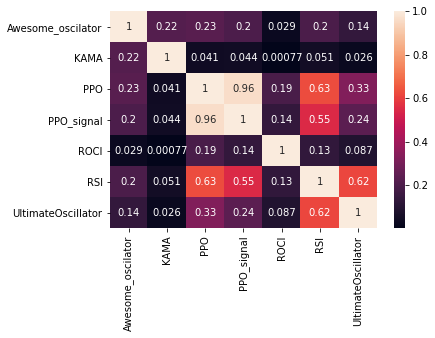

In [29]:
df_mom = df[['Awesome_oscilator','KAMA','PPO','PPO_signal','ROCI','RSI','UltimateOscillator']]
corrMatrix = df_mom.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Volume corr

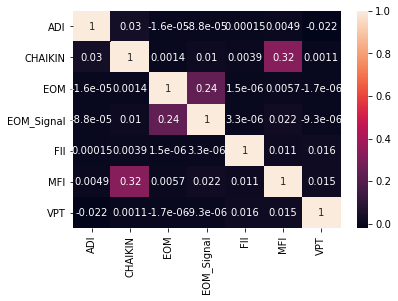

In [30]:
df_volume = df[['ADI','CHAIKIN','EOM','EOM_Signal','FII','MFI','VPT']]
corrMatrix = df_volume.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Trend Corr

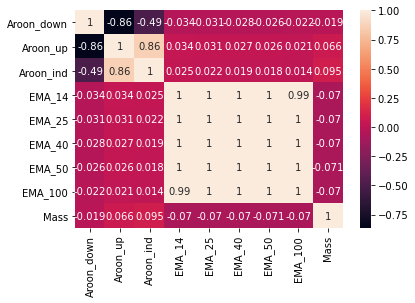

In [32]:
df_trend = df[['Aroon_down','Aroon_up','Aroon_ind','EMA_14','EMA_25','EMA_40','EMA_50','EMA_100','Mass']]
corrMatrix = df_trend.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Volatility Corr

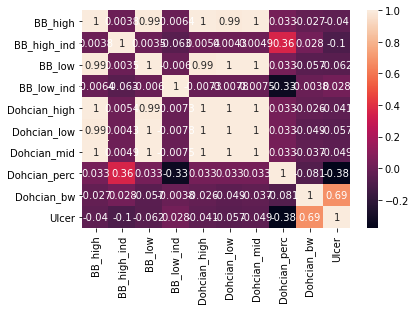

In [31]:
df_volatility = df[['BB_high','BB_high_ind','BB_low','BB_low_ind','Dohcian_high','Dohcian_low','Dohcian_mid','Dohcian_perc','Dohcian_bw','Ulcer']]
corrMatrix = df_volatility.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

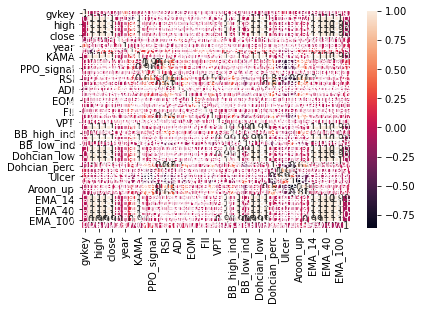

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()